### Fruit Classification Results Analysis and Visualization with t-SNE

**Notebook Overview:**

This notebook represents the final step in our fruit classification project, building upon the previous notebook that involved fruit classification on AWS using PySpark and TensorFlow. In this notebook, we retrieve the classification results stored in an S3 bucket and further analyze and visualize them. Additionally, we perform dimensionality reduction using t-SNE (t-distributed Stochastic Neighbor Embedding) to gain insights from the data.

**Tentative Table of Contents:**

1.  **Retrieving Classification Results from S3**
    
    *   Using AWS SDK (boto3) to access the S3 bucket.
    *   Downloading the classification results in .parquet file format.
2.  **Loading and Combining Classification Results**
    
    *   Reading and loading the downloaded .parquet files into DataFrames.
    *   Combining individual DataFrames into a single DataFrame for analysis.
3.  **Subsampling Data for Visualization**
    
    *   Randomly selecting a subset of fruit categories for visualization.
    *   Subsampling the data based on the selected categories.
4.  **Dimensionality Reduction with t-SNE**
    
    *   Applying t-SNE for dimensionality reduction to two dimensions.
    *   Visualizing the subsampled data in a scatterplot with color-coded categories.


In [1]:
import os
import boto3

s3 = boto3.client('s3')
bucket_name = 'iso-can-91'
folder_path = 'Results'
local_directory = 'RESULTS_S3'  # Specify your local directory here

# Create the local directory if it doesn't exist
os.makedirs(local_directory, exist_ok=True)

# List objects in the folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_path)

# Download each object to the local machine
for obj in objects.get('Contents', []):
    key = obj['Key']
    local_file_path = os.path.join(local_directory, os.path.relpath(key, folder_path))
    s3.download_file(bucket_name, key, local_file_path)

In [2]:
import pandas as pd
import pyarrow.parquet as pq


# Specify the directory containing your Parquet files
parquet_directory = 'RESULTS_S3/'

# Get a list of all Parquet files in the directory
parquet_files = [file for file in os.listdir(parquet_directory) if file.endswith('.parquet')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Read each Parquet file and append to the list
for file in parquet_files:
    file_path = os.path.join(parquet_directory, file)
    df = pd.read_parquet(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df.head())



                                              path        label  \
0     s3://iso-can-91/Test/Watermelon/r_80_100.jpg   Watermelon   
1     s3://iso-can-91/Test/Watermelon/r_59_100.jpg   Watermelon   
2     s3://iso-can-91/Test/Watermelon/r_53_100.jpg   Watermelon   
3       s3://iso-can-91/Test/Raspberry/110_100.jpg    Raspberry   
4  s3://iso-can-91/Test/Cauliflower/r2_207_100.jpg  Cauliflower   

                                            features  
0  [0.607365, 0.062016457, 0.0, 0.020300692, 0.00...  
1  [0.77535725, 0.24524362, 0.0, 0.006434773, 0.8...  
2  [1.0325085, 0.39031178, 0.017980807, 0.1451601...  
3  [0.07994602, 0.524364, 0.0, 0.0, 0.12695368, 0...  
4  [0.0, 0.5514804, 2.2314353, 0.0, 0.0, 0.0, 0.0...  


In [3]:
combined_df

,path,label,features
0,s3://iso-can-91/Test/Watermelon/r_80_100.jpg,Watermelon,"[0.607365, 0.062016457, 0.0, 0.020300692, 0.00..."
1,s3://iso-can-91/Test/Watermelon/r_59_100.jpg,Watermelon,"[0.77535725, 0.24524362, 0.0, 0.006434773, 0.8..."
2,s3://iso-can-91/Test/Watermelon/r_53_100.jpg,Watermelon,"[1.0325085, 0.39031178, 0.017980807, 0.1451601..."
3,s3://iso-can-91/Test/Raspberry/110_100.jpg,Raspberry,"[0.07994602, 0.524364, 0.0, 0.0, 0.12695368, 0..."
4,s3://iso-can-91/Test/Cauliflower/r2_207_100.jpg,Cauliflower,"[0.0, 0.5514804, 2.2314353, 0.0, 0.0, 0.0, 0.0..."
...,...,...,...
22683,s3://iso-can-91/Test/Banana Red/r_160_100.jpg,Banana Red,"[0.09093557, 0.5115333, 0.0, 0.018634344, 0.83..."
22684,s3://iso-can-91/Test/Banana Red/r_164_100.jpg,Banana Red,"[0.42868358, 0.602879, 0.0, 0.021609344, 0.430..."
22685,s3://iso-can-91/Test/Hazelnut/r_162_100.jpg,Hazelnut,"[1.4373387, 0.0, 0.0, 0.0047755567, 0.00075964..."
22686,s3://iso-can-91/Test/Banana/r_60_100.jpg,Banana,"[0.065097824, 0.21137503, 0.0, 0.0, 0.4231022,..."


In [10]:
import random

all_categories = combined_df['label'].unique()

# Convert the NumPy array to a list
all_categories_list = all_categories.tolist()

# Choose six random categories from the unique categories
# chosen_categories = random.sample(all_categories_list, 10)



# Subsample the dataframe
subsampled_df = combined_df[combined_df['label'].isin(all_categories_list)]

display(subsampled_df)


,path,label,features
0,s3://iso-can-91/Test/Watermelon/r_80_100.jpg,Watermelon,"[0.607365, 0.062016457, 0.0, 0.020300692, 0.00..."
1,s3://iso-can-91/Test/Watermelon/r_59_100.jpg,Watermelon,"[0.77535725, 0.24524362, 0.0, 0.006434773, 0.8..."
2,s3://iso-can-91/Test/Watermelon/r_53_100.jpg,Watermelon,"[1.0325085, 0.39031178, 0.017980807, 0.1451601..."
3,s3://iso-can-91/Test/Raspberry/110_100.jpg,Raspberry,"[0.07994602, 0.524364, 0.0, 0.0, 0.12695368, 0..."
4,s3://iso-can-91/Test/Cauliflower/r2_207_100.jpg,Cauliflower,"[0.0, 0.5514804, 2.2314353, 0.0, 0.0, 0.0, 0.0..."
...,...,...,...
22683,s3://iso-can-91/Test/Banana Red/r_160_100.jpg,Banana Red,"[0.09093557, 0.5115333, 0.0, 0.018634344, 0.83..."
22684,s3://iso-can-91/Test/Banana Red/r_164_100.jpg,Banana Red,"[0.42868358, 0.602879, 0.0, 0.021609344, 0.430..."
22685,s3://iso-can-91/Test/Hazelnut/r_162_100.jpg,Hazelnut,"[1.4373387, 0.0, 0.0, 0.0047755567, 0.00075964..."
22686,s3://iso-can-91/Test/Banana/r_60_100.jpg,Banana,"[0.065097824, 0.21137503, 0.0, 0.0, 0.4231022,..."


In [11]:
features = pd.DataFrame(subsampled_df['features'].values.tolist(), index= subsampled_df.index)


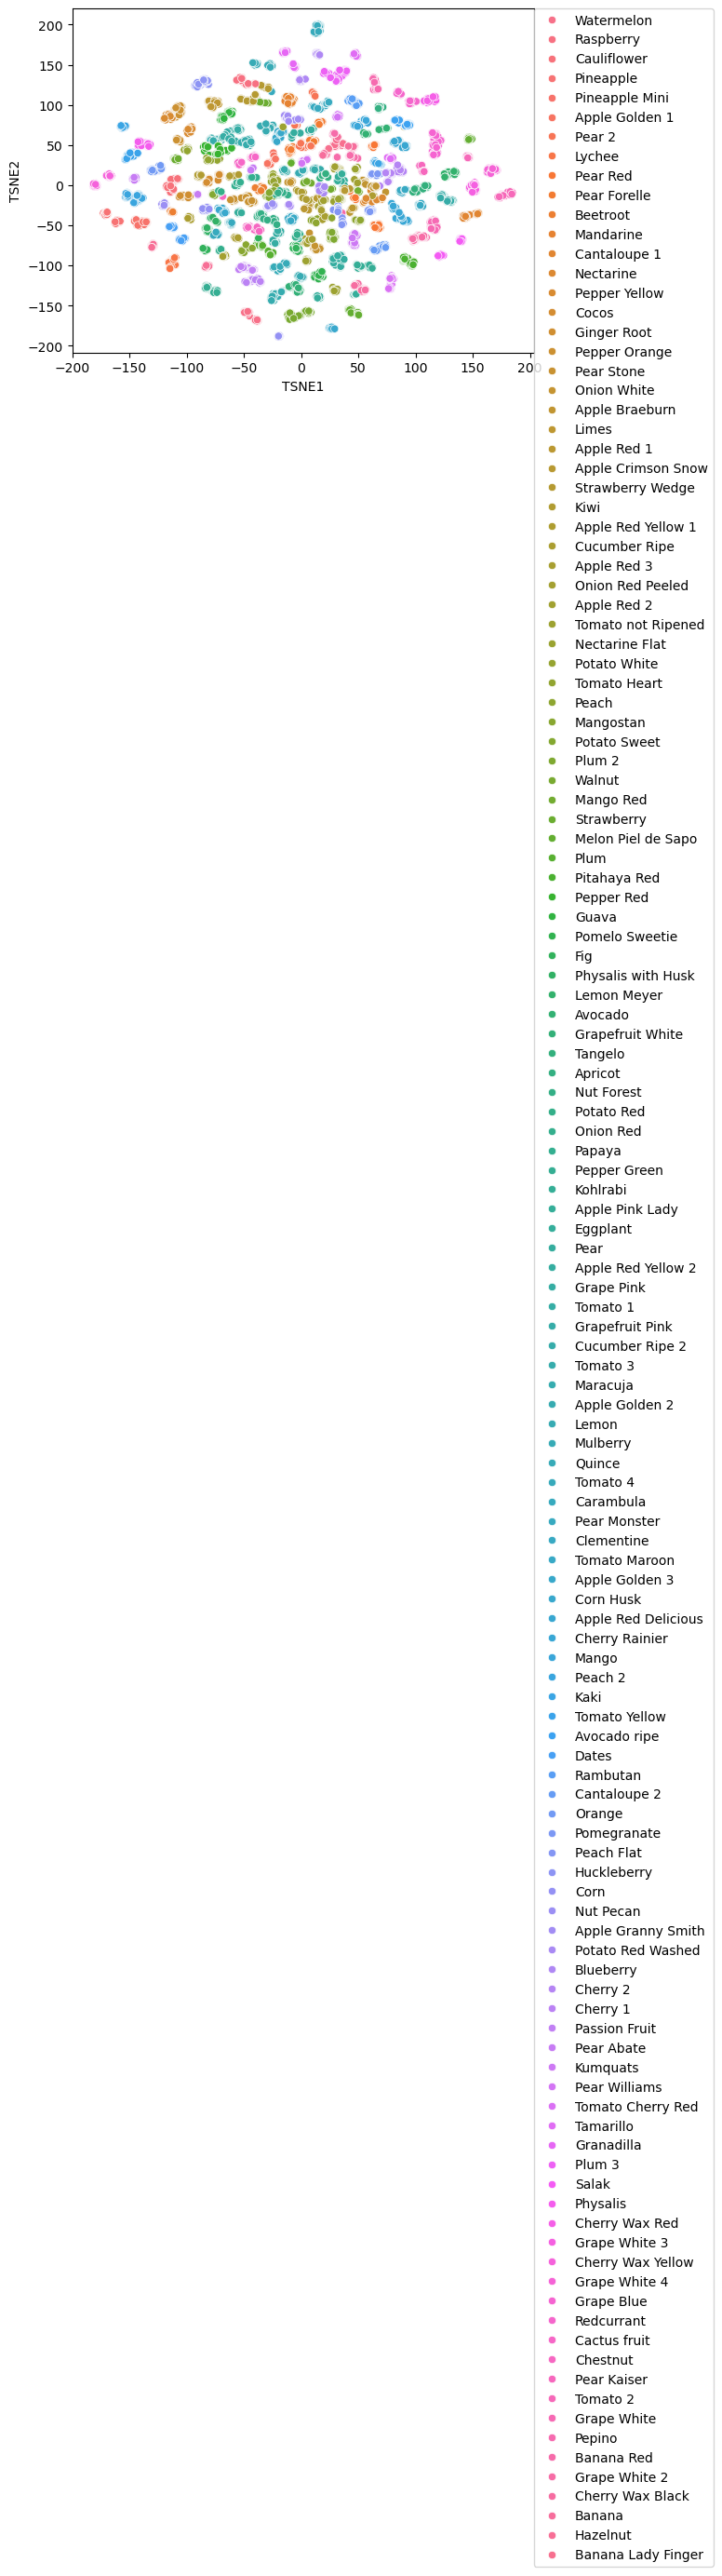

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Create t-sne dataframe
tsne_df = pd.DataFrame(TSNE(n_components=2, perplexity=50, n_iter=5000, init='random', random_state=1944).fit_transform(features), columns=['TSNE1', 'TSNE2'])

# Reset the index of subsampled_df
subsampled_df_reset = subsampled_df.reset_index(drop=True)

# Add category
tsne_df['label'] = subsampled_df_reset['label']

# Display scatterplot
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='label')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.show()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA1271,PCA1272,PCA1273,PCA1274,PCA1275,PCA1276,PCA1277,PCA1278,PCA1279,PCA1280
0,-6.290116,3.308683,0.603982,-1.262771,-2.149866,2.090653,-7.390656,-4.133719,4.014199,1.598267,...,-0.023062,-0.014295,-0.055107,-0.022319,0.002141,-0.000806,-0.011518,-0.000322,-0.017455,-0.026763
1,-6.591308,2.234338,1.269360,-0.007931,-2.890896,1.090262,-5.186672,-2.018156,3.938548,0.192935,...,0.014911,0.015082,-0.041389,-0.014817,0.025769,0.022968,-0.009999,0.003791,0.002360,-0.006900
2,-5.260880,3.037212,1.938472,-0.024177,-1.736004,1.459858,-3.546025,-1.867378,4.813937,0.142409,...,0.004525,-0.017241,-0.000101,-0.019278,-0.007612,-0.001996,-0.015816,-0.003652,0.003671,-0.010056
3,-3.126017,2.844981,-6.831440,3.388965,7.679837,-2.066313,-3.656037,1.289299,-0.797181,-1.848471,...,-0.005904,-0.018084,0.000819,-0.012394,0.017017,0.011147,0.007213,0.006490,0.004032,0.002904
4,-7.155550,0.127158,-4.574861,-2.168753,7.853973,-0.278813,-3.168579,-0.821630,-4.597061,-1.446726,...,-0.010233,-0.006644,0.018699,-0.015671,-0.006195,-0.004417,0.008139,0.006741,0.015037,0.006106


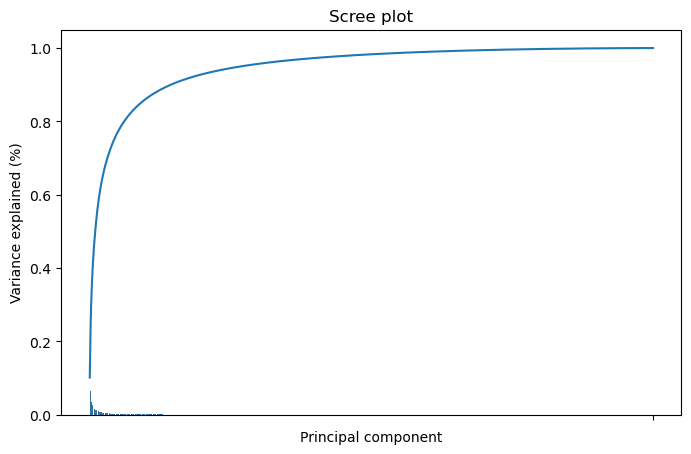

In [32]:
from sklearn.decomposition import PCA
import numpy as np

# Number of components
PCA_K = 1280

# Create PCA model
pca = PCA(n_components=PCA_K)

# Fit to data
pca_data = pca.fit_transform(features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(pca_data, columns=['PCA'+str(i) for i in range(1, pca_data.shape[1]+1)])

# Display the first few rows of the PCA DataFrame
display(pca_df.head())

# Get explained variance ratio
pca_evr = list(pca.explained_variance_ratio_)
pca_evr_cumsum = np.cumsum(pca_evr)

# Display scree plot
plt.figure(figsize=(8, 5))
plt.title("Scree plot")
sns.barplot(x=pca_df.columns, y=pca_evr)
sns.lineplot(x=pca_df.columns, y=pca_evr_cumsum)
plt.xlabel('Principal component')
plt.xticks('')
plt.ylabel('Variance explained (%)')
plt.show()


In [30]:
# Find thresholds
for th_val in [0.8, 0.85, 0.90, 0.95, 100]:
    th_idx = np.argmax(pca_evr_cumsum > th_val)
    if th_idx > 0:
        print('{:.0%} of the variance is explained by {} principal components ({:.4})' \
              .format(th_val, th_idx+1, pca_evr_cumsum[th_idx]))

# Show max component
print('{:.0%} of the variance is explained by {} principal components ({:.4})' \
              .format(pca_evr_cumsum[PCA_K-1], PCA_K, pca_evr_cumsum[PCA_K-1]))


80% of the variance is explained by 80 principal components (0.8015)
85% of the variance is explained by 117 principal components (0.8505)
90% of the variance is explained by 185 principal components (0.9)
95% of the variance is explained by 344 principal components (0.95)
100% of the variance is explained by 1280 principal components (1.0)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA1271,PCA1272,PCA1273,PCA1274,PCA1275,PCA1276,PCA1277,PCA1278,PCA1279,PCA1280
0,-6.290116,3.308683,0.603982,-1.262771,-2.149866,2.090653,-7.390656,-4.133719,4.014199,1.598267,...,-0.023062,-0.014295,-0.055107,-0.022319,0.002141,-0.000806,-0.011518,-0.000322,-0.017455,-0.026763
1,-6.591308,2.234338,1.269360,-0.007931,-2.890896,1.090262,-5.186672,-2.018156,3.938548,0.192935,...,0.014911,0.015082,-0.041389,-0.014817,0.025769,0.022968,-0.009999,0.003791,0.002360,-0.006900
2,-5.260880,3.037212,1.938472,-0.024177,-1.736004,1.459858,-3.546025,-1.867378,4.813937,0.142409,...,0.004525,-0.017241,-0.000101,-0.019278,-0.007612,-0.001996,-0.015816,-0.003652,0.003671,-0.010056
3,-3.126017,2.844981,-6.831440,3.388965,7.679837,-2.066313,-3.656037,1.289299,-0.797181,-1.848471,...,-0.005904,-0.018084,0.000819,-0.012394,0.017017,0.011147,0.007213,0.006490,0.004032,0.002904
4,-7.155550,0.127158,-4.574861,-2.168753,7.853973,-0.278813,-3.168579,-0.821630,-4.597061,-1.446726,...,-0.010233,-0.006644,0.018699,-0.015671,-0.006195,-0.004417,0.008139,0.006741,0.015037,0.006106


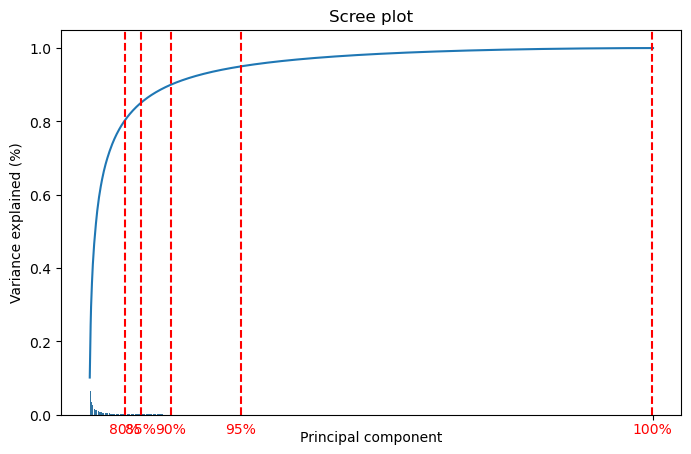

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Number of components
PCA_K = 1280

# Create PCA model
pca = PCA(n_components=PCA_K)

# Fit to data
pca_data = pca.fit_transform(features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(pca_data, columns=['PCA'+str(i) for i in range(1, pca_data.shape[1]+1)])

# Display the first few rows of the PCA DataFrame
display(pca_df.head())

# Get explained variance ratio
pca_evr = list(pca.explained_variance_ratio_)
pca_evr_cumsum = np.cumsum(pca_evr)

# Display scree plot
plt.figure(figsize=(8, 5))
plt.title("Scree plot")
sns.barplot(x=pca_df.columns, y=pca_evr)
sns.lineplot(x=pca_df.columns, y=pca_evr_cumsum)
plt.xlabel('Principal component')
plt.xticks('')
plt.ylabel('Variance explained (%)')

# Add perpendicular lines for the explained variance values
explained_variances = [0.80, 0.85, 0.90, 0.95, 1.0]

for evr in explained_variances:
    idx = np.argmax(pca_evr_cumsum >= evr)
    plt.axvline(x=idx, color='red', linestyle='--')
    plt.text(idx, -0.05, f'{evr:.0%}', color='red', ha='center')

plt.show()
